In [1]:
from fastai import *
from fastai.vision import *

In [12]:
folder = 'jackson'
file = 'download.csv'

In [23]:
folder = 'jordan'
file = 'download.csv'

In [27]:
folder = 'phelps'
file = 'download.csv'

In [28]:
path = Path('../../data/michael/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [29]:
classes = ['jackson','jordan','phelps']

In [30]:
download_images(path/folder/file, dest, max_pics=200)

Error https://img.washingtonpost.com/rf/image_480w/2010-2019/WashingtonPost/2016/08/03/Sports/Images/585570808-2545.jpg?uuid=blQvhlm0EeaDHQMkdgyoVg HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/rf/image_960w/2010-2019/WashingtonPost/2016/08/08/Sports/Images/JN3_36051470627551.jpg&w=480 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://s.yimg.com/uu/api/res/1.2/7W8b19wjRojGzRFxB8FPyA--~B/aD0zMjcwO3c9NDM2MDtzbT0xO2FwcGlkPXl0YWNoeW9u/http://globalfinance.zenfs.com/en_us/Finance/US_AFTP_SILICONALLEY_H_LIVE/Heres_what_Michael_Phelps_eats-5182ef5c3e6c2fdb103b8df06dd436ac HTTPSConnectionPool(host='s.yimg.com', port=443): Read timed out. (read timeout=4)


In [32]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

jackson


jordan


phelps


In [33]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [34]:
data.classes

['jackson', 'jordan', 'phelps']

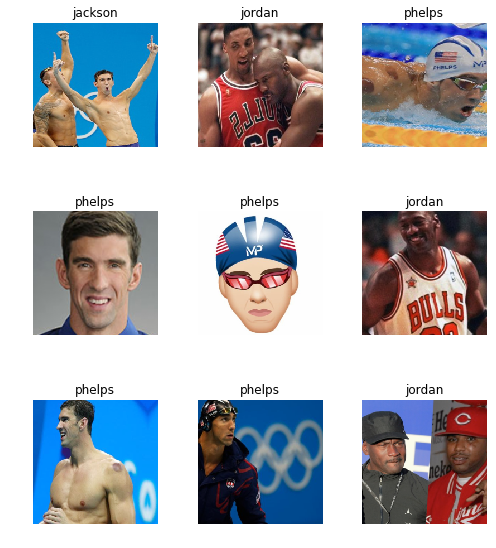

In [35]:
data.show_batch(rows=3, figsize=(7,8))

In [36]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [37]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.327016,1.100924,0.487603
2,1.136240,1.158767,0.561983
3,1.012430,1.229237,0.537190
4,0.911226,1.210644,0.561983


In [38]:
learn.save('stage-1')

In [39]:
learn.unfreeze()

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


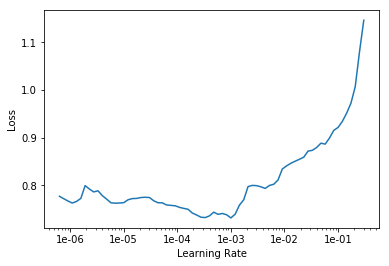

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.784985,1.330001,0.586777
2,0.760270,1.314965,0.578512


In [43]:
learn.save('stage-2')

In [44]:
learn.load('stage-2');

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

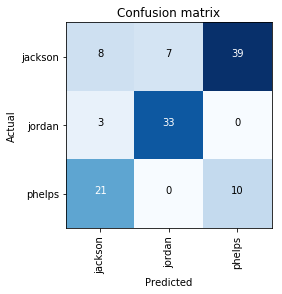

In [46]:
interp.plot_confusion_matrix()

In [47]:
from fastai.widgets import *